In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import statsmodels.api as sm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

In [33]:
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

강서_데이터1 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
강서_데이터2 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_02.csv',encoding='utf-8')

강서_데이터 = pd.concat([강서_데이터1, 강서_데이터2], ignore_index=True)
print(len(강서_데이터))

top_20_ID = pd.read_csv('../../Data/따릉이/쏠림정도_top20_대여소.csv',encoding='utf-8')

3385613


In [34]:
강서_데이터.head()

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
0,2023-05-08,200,ST-2037,ST-2037,1,1,30,0,0,0
1,2023-05-08,1155,ST-824,ST-824,1,1,80,0,0,0
2,2023-05-08,1230,ST-829,ST-829,1,1,111,0,0,0
3,2023-05-08,1340,ST-2611,ST-2611,1,1,10,0,0,0
4,2023-05-08,1635,ST-2031,ST-2031,1,1,170,0,0,0


In [7]:
top_20_ID

,Unnamed: 0,최종용도,대여소_ID,temp_num,출근대여량,출근반납량,대여-반납량_출근,차이절대값_출근,총이용량_출근,퇴근대여량,퇴근반납량,대여-반납량_퇴근,차이절대값_퇴근,총이용량_퇴근,출퇴근_총이용량,차이절대값합
0,0,상업,ST-1064,180,3764,8489,-4725,4725,12253,9005,5562,3443,3443,14567,26820,8168
1,1,상업,ST-1688,188,881,7017,-6136,6136,7898,7922,3320,4602,4602,11242,19140,10738
2,2,상업,ST-1712,193,698,11208,-10510,10510,11906,7548,754,6794,6794,8302,20208,17304
3,3,상업,ST-2031,182,18661,22323,-3662,3662,40984,27533,22552,4981,4981,50085,91069,8643
4,4,상업,ST-2033,195,927,17721,-16794,16794,18648,14171,3574,10597,10597,17745,36393,27391
5,5,상업,ST-2035,194,1306,13073,-11767,11767,14379,10752,3553,7199,7199,14305,28684,18966
6,6,상업,ST-2044,190,1911,11044,-9133,9133,12955,6995,1434,5561,5561,8429,21384,14694
7,7,상업,ST-2569,176,889,4972,-4083,4083,5861,4068,1503,2565,2565,5571,11432,6648
8,8,상업,ST-2871,186,5501,10328,-4827,4827,15829,10568,6131,4437,4437,16699,32528,9264
9,9,상업,ST-2945,177,1201,6098,-4897,4897,7299,5019,2183,2836,2836,7202,14501,7733


In [35]:
# 주거와 상업으로 데이터 분할
주거_df = top_20_ID[top_20_ID['최종용도'] == '주거']
상업_df = top_20_ID[top_20_ID['최종용도'] == '상업']

In [36]:
# 주거 데이터에서 대여소_ID 추출
주거_IDs = 주거_df['대여소_ID'].unique()

# 상업 데이터에서 대여소_ID 추출
상업_IDs = 상업_df['대여소_ID'].unique()

# 강서 데이터에서 대여소_ID가 주거 데이터에 있는 것만 추출
주거_강서_df = 강서_데이터[강서_데이터['시작_대여소_ID'].isin(주거_IDs)]

# 강서 데이터에서 대여소_ID가 상업 데이터에 있는 것만 추출
상업_강서_df = 강서_데이터[강서_데이터['시작_대여소_ID'].isin(상업_IDs)]

In [17]:
주거_IDs

array(['ST-1253', 'ST-1352', 'ST-1645', 'ST-2050', 'ST-2056', 'ST-2557',
       'ST-2965'], dtype=object)

In [37]:
주거_강서_df = 주거_강서_df.sort_values(by='기준_날짜')
상업_강서_df = 상업_강서_df.sort_values(by='기준_날짜')

In [22]:
주거_강서_df

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
1599090,2023-04-03,745,ST-1645,ST-2056,1,6,1281,0,0,0
1601738,2023-04-03,1030,ST-2557,ST-531,1,25,2179,0,0,0
1601726,2023-04-03,1030,ST-1645,ST-1645,1,20,2780,0,0,0
1601705,2023-04-03,1025,ST-2557,ST-3094,1,5,724,0,0,0
1601704,2023-04-03,1025,ST-2557,ST-2059,1,4,701,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3290642,2024-03-29,1425,ST-1253,ST-1718,1,3,700,4,0,0
3290635,2024-03-29,1420,ST-2965,ST-1688,1,8,1520,4,0,0
3290627,2024-03-29,1420,ST-2050,ST-2871,1,3,413,4,0,0
3290871,2024-03-29,1455,ST-2557,ST-2037,1,14,1402,4,0,0


In [49]:
grouped_data = 주거_강서_df.groupby(['기준_날짜', '시작_대여소_ID'])['전체_건수'].sum().reset_index()
print(grouped_data)

           기준_날짜 시작_대여소_ID  전체_건수
0     2023-04-03   ST-1253     94
1     2023-04-03   ST-1352    155
2     2023-04-03   ST-1645    158
3     2023-04-03   ST-2056    170
4     2023-04-03   ST-2557    185
...          ...       ...    ...
1640  2024-03-29   ST-1645    110
1641  2024-03-29   ST-2050    141
1642  2024-03-29   ST-2056    115
1643  2024-03-29   ST-2557    156
1644  2024-03-29   ST-2965    104

[1645 rows x 3 columns]


In [66]:
len(주거_IDs)

7

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])


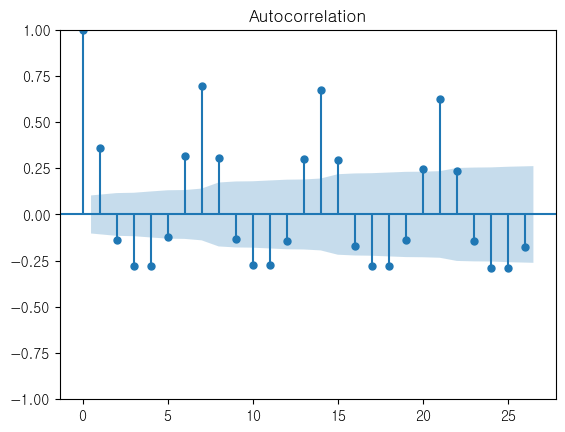

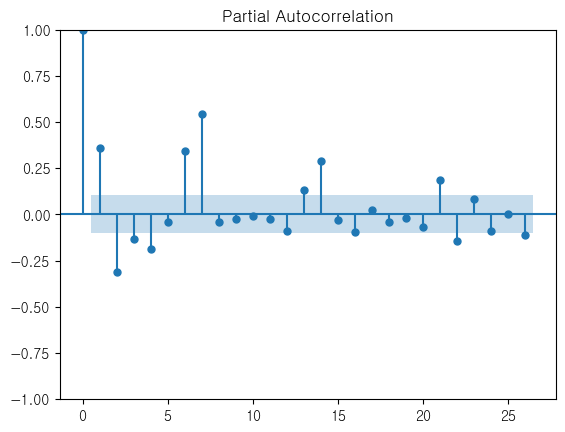

                               SARIMAX Results                                
Dep. Variable:                  전체_건수   No. Observations:                  362
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2009.012
Date:                Tue, 07 May 2024   AIC                           4024.025
Time:                        21:31:10   BIC                           4035.691
Sample:                    04-03-2023   HQIC                          4028.663
                         - 03-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1380      0.083     -1.663      0.096      -0.301       0.025
ar.L2         -0.2973      0.053     -5.573      0.000      -0.402      -0.193
sigma2      3990.8444    310.383     12.858      0.0

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = model_fit.forecast(steps=1)[0]


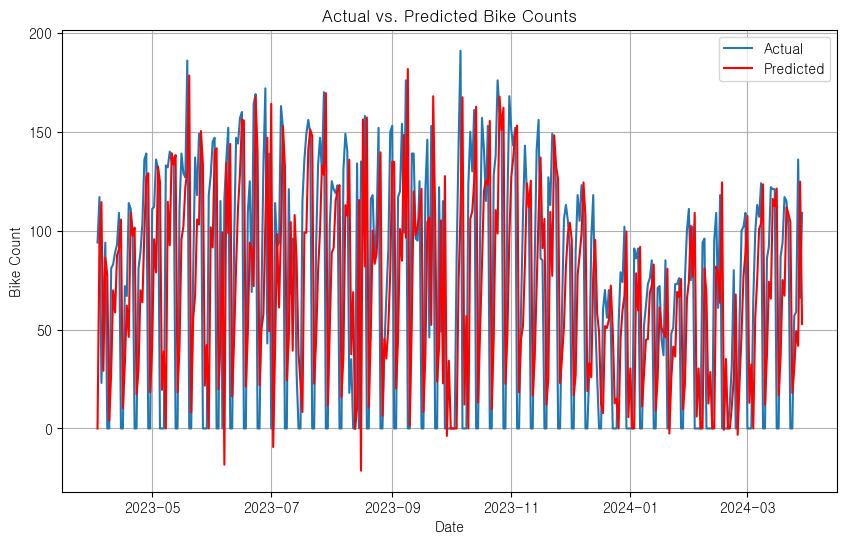

대여소 ST-1253의 다음 시간대 예측값: 123.8788581018663


C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])


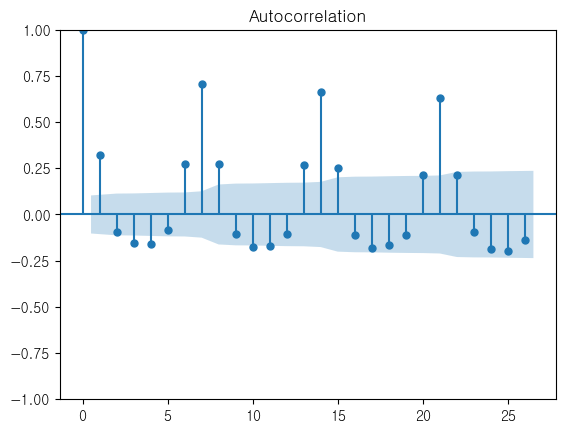

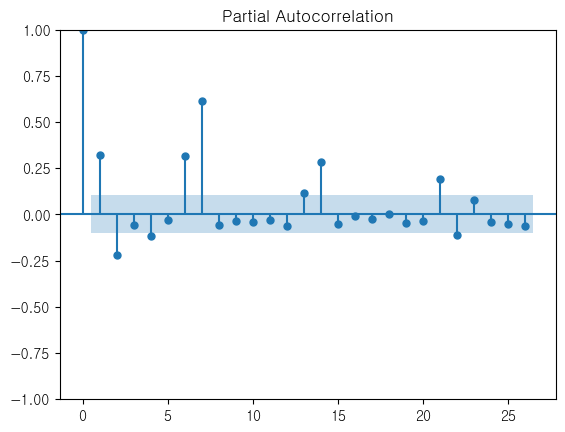

                               SARIMAX Results                                
Dep. Variable:                  전체_건수   No. Observations:                  362
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2114.844
Date:                Tue, 07 May 2024   AIC                           4235.687
Time:                        21:31:11   BIC                           4247.354
Sample:                    04-03-2023   HQIC                          4240.326
                         - 03-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2542      0.078     -3.245      0.001      -0.408      -0.101
ar.L2         -0.3090      0.047     -6.574      0.000      -0.401      -0.217
sigma2      7183.2947    583.111     12.319      0.0

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = model_fit.forecast(steps=1)[0]


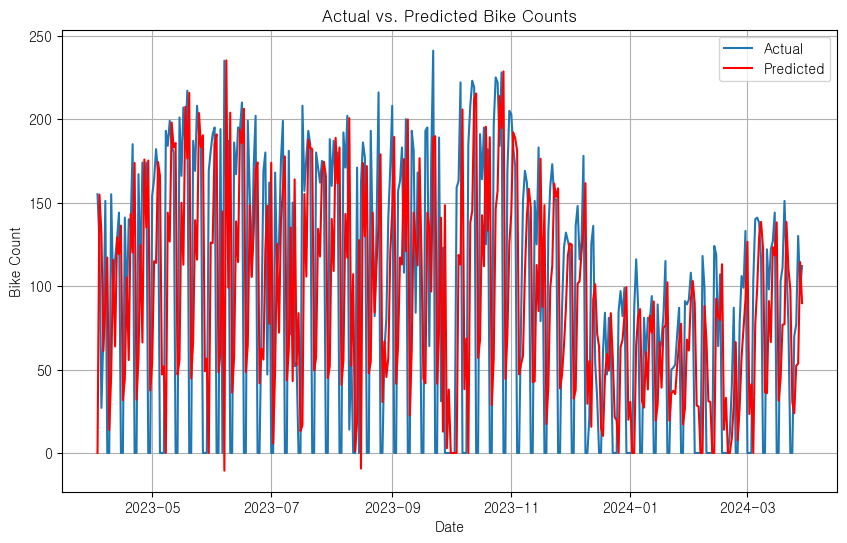

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])


대여소 ST-1352의 다음 시간대 예측값: 118.32750614985963


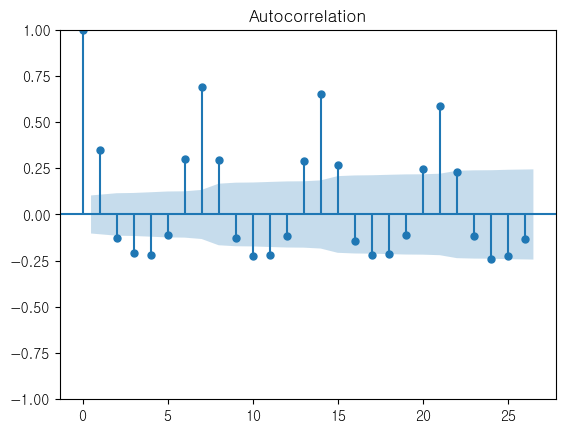

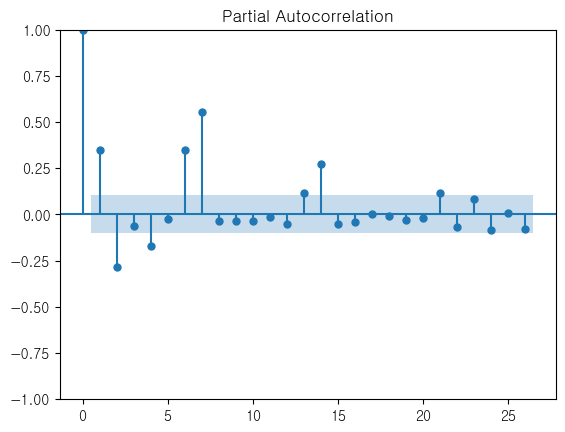

                               SARIMAX Results                                
Dep. Variable:                  전체_건수   No. Observations:                  362
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2069.030
Date:                Tue, 07 May 2024   AIC                           4144.060
Time:                        21:31:11   BIC                           4155.726
Sample:                    04-03-2023   HQIC                          4148.698
                         - 03-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1757      0.080     -2.196      0.028      -0.333      -0.019
ar.L2         -0.3275      0.049     -6.722      0.000      -0.423      -0.232
sigma2      5561.3370    433.228     12.837      0.0

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = model_fit.forecast(steps=1)[0]


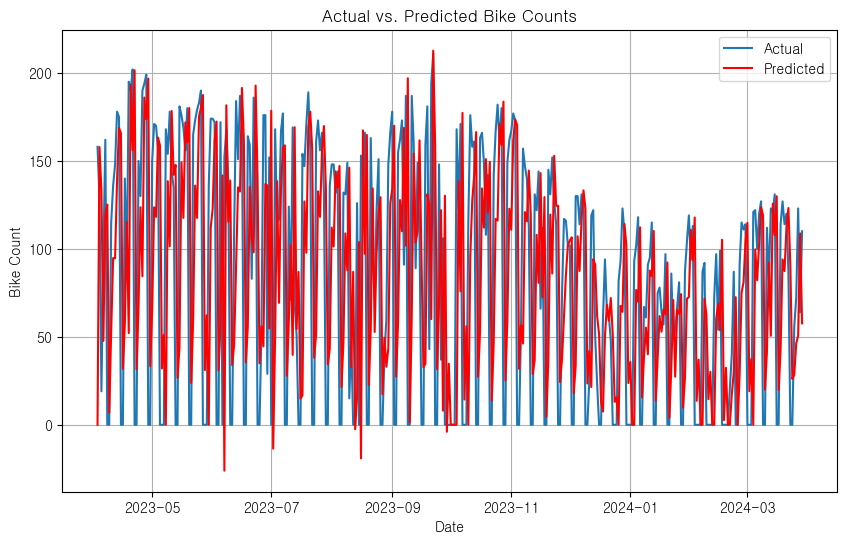

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])


대여소 ST-1645의 다음 시간대 예측값: 121.23709955912159


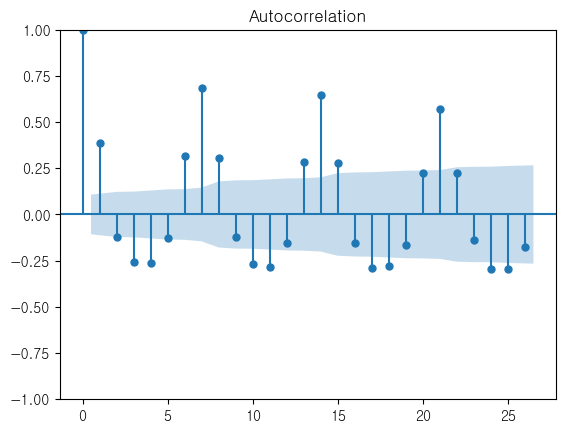

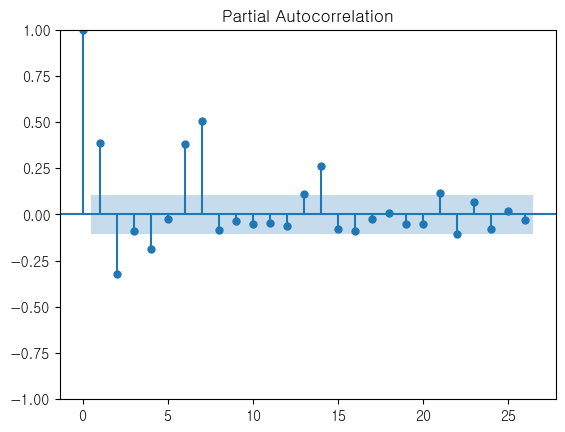

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = model_fit.forecast(steps=1)[0]


                               SARIMAX Results                                
Dep. Variable:                  전체_건수   No. Observations:                  333
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1923.523
Date:                Tue, 07 May 2024   AIC                           3853.046
Time:                        21:31:11   BIC                           3864.462
Sample:                    05-02-2023   HQIC                          3857.599
                         - 03-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1109      0.084     -1.315      0.189      -0.276       0.054
ar.L2         -0.3163      0.054     -5.828      0.000      -0.423      -0.210
sigma2      6341.3500    499.675     12.691      0.0

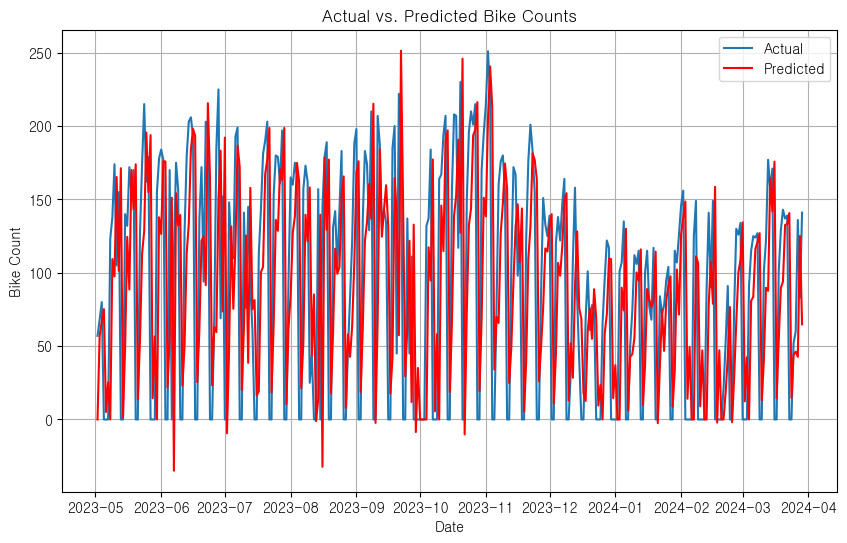

대여소 ST-2050의 다음 시간대 예측값: 151.33150027353625


C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])


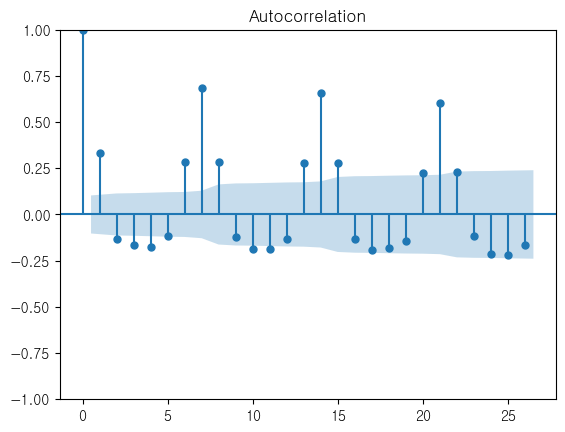

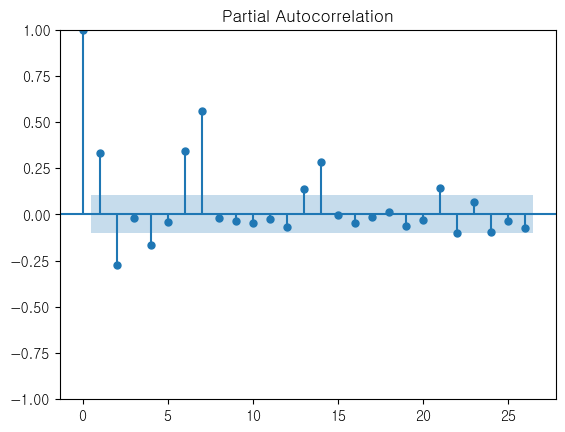

                               SARIMAX Results                                
Dep. Variable:                  전체_건수   No. Observations:                  362
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2108.175
Date:                Tue, 07 May 2024   AIC                           4222.350
Time:                        21:31:12   BIC                           4234.017
Sample:                    04-03-2023   HQIC                          4226.988
                         - 03-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2075      0.072     -2.870      0.004      -0.349      -0.066
ar.L2         -0.3545      0.049     -7.229      0.000      -0.451      -0.258
sigma2      6906.7581    542.725     12.726      0.0

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = model_fit.forecast(steps=1)[0]


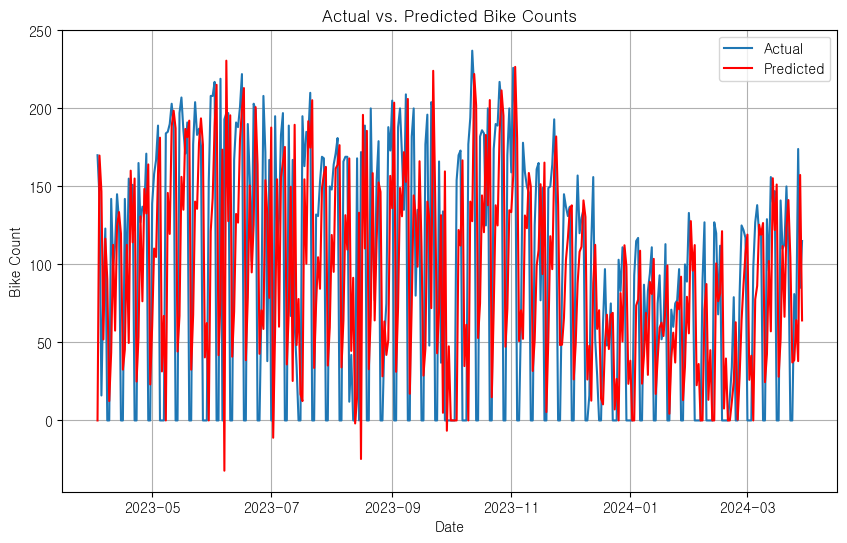

대여소 ST-2056의 다음 시간대 예측값: 140.32983096049557


C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])


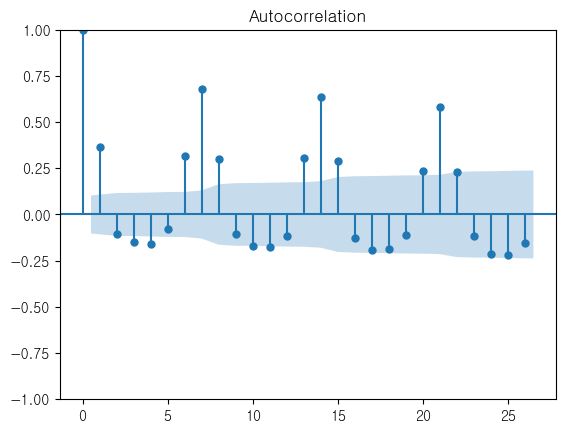

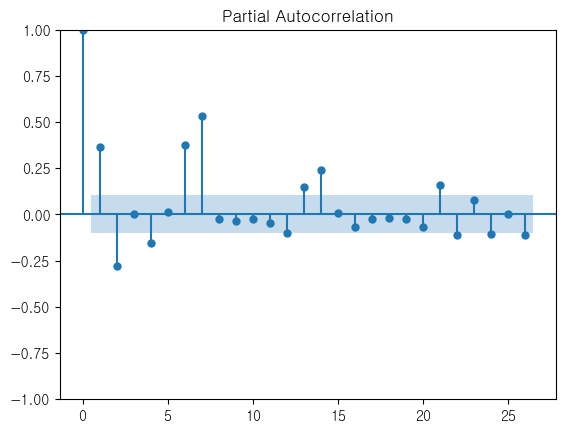

                               SARIMAX Results                                
Dep. Variable:                  전체_건수   No. Observations:                  362
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2225.546
Date:                Tue, 07 May 2024   AIC                           4457.093
Time:                        21:31:12   BIC                           4468.759
Sample:                    04-03-2023   HQIC                          4461.731
                         - 03-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1715      0.072     -2.371      0.018      -0.313      -0.030
ar.L2         -0.3611      0.046     -7.805      0.000      -0.452      -0.270
sigma2      1.326e+04   1006.061     13.181      0.0

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = model_fit.forecast(steps=1)[0]


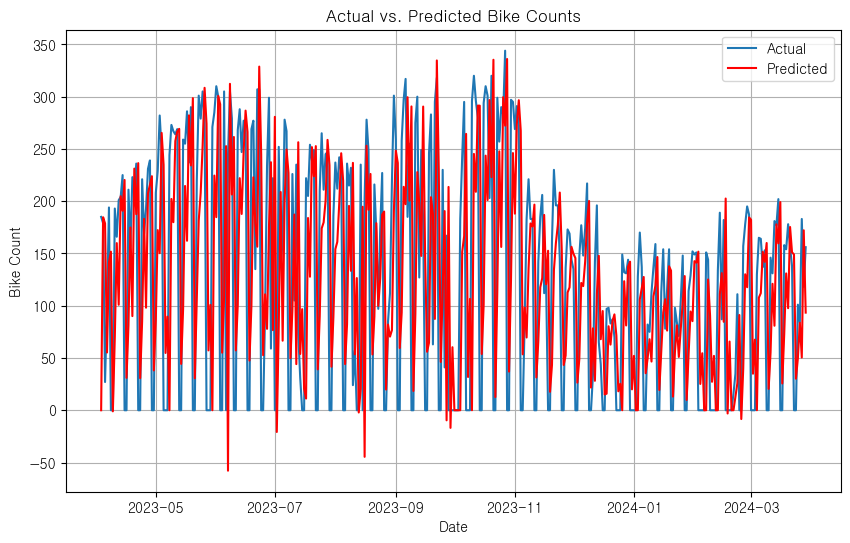

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])


대여소 ST-2557의 다음 시간대 예측값: 172.95571067963624


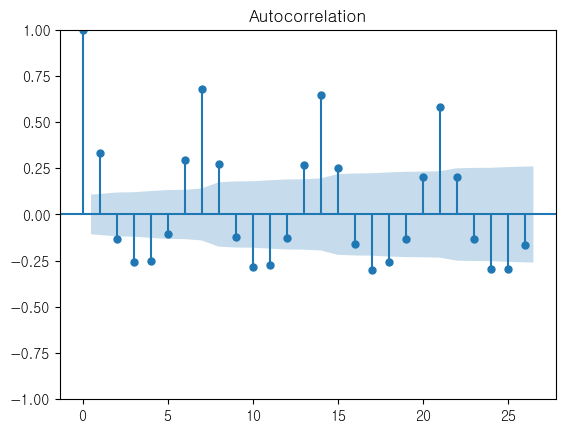

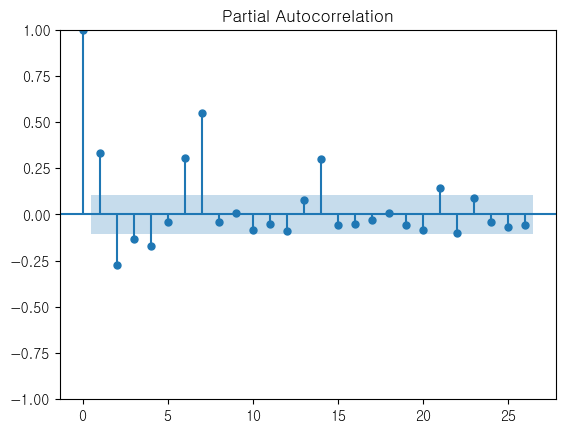

                               SARIMAX Results                                
Dep. Variable:                  전체_건수   No. Observations:                  333
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1861.134
Date:                Tue, 07 May 2024   AIC                           3728.268
Time:                        21:31:13   BIC                           3739.683
Sample:                    05-02-2023   HQIC                          3732.820
                         - 03-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1922      0.083     -2.316      0.021      -0.355      -0.030
ar.L2         -0.2849      0.053     -5.411      0.000      -0.388      -0.182
sigma2      4329.3308    380.026     11.392      0.0

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61908\2118682855.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = model_fit.forecast(steps=1)[0]


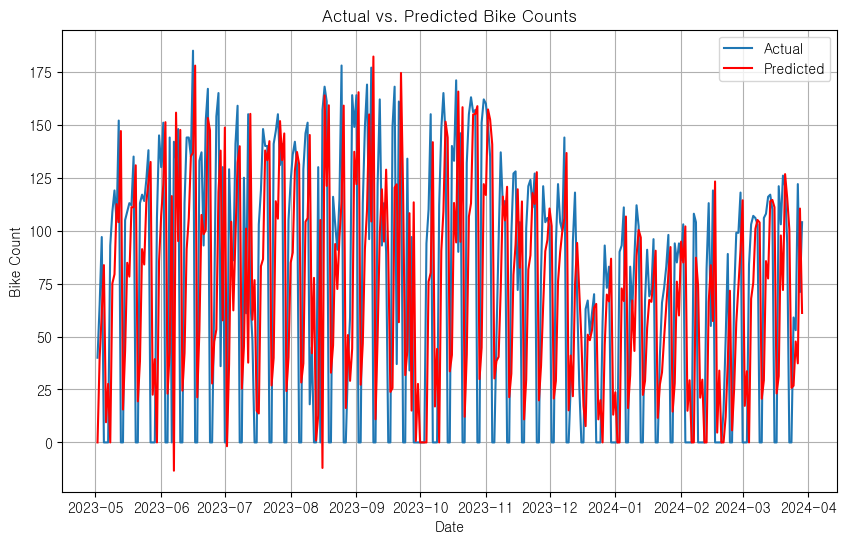

대여소 ST-2965의 다음 시간대 예측값: 112.18875352922325


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA 모델 학습 및 예측 함수
def arima_forecast(data):
    plot_acf(data)
    plot_pacf(data)
    plt.show()
    # ARIMA 모델 학습
    # ARIMA 모델 학습
    model = ARIMA(data, order=(2,1,0))  # ARIMA(p,d,q) 모델 설정
    model_fit = model.fit()

    # 다음 시간대의 예측값 계산
    forecast = model_fit.forecast(steps=1)[0]
    
        # 예측 결과 출력
    print(model_fit.summary())

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data.values, label='Actual')
    plt.plot(data.index, model_fit.predict(start=0, end=len(data)-1), label='Predicted', color='red')
    plt.title('Actual vs. Predicted Bike Counts')
    plt.xlabel('Date')
    plt.ylabel('Bike Count')
    plt.legend()
    plt.grid(True)
    plt.show()
    return forecast

# 주거 대여소의 시계열 분석
for 주거_ID in 주거_IDs:
    
    # 해당 주거 대여소의 데이터 추출
    주거_data = 주거_강서_df[주거_강서_df['시작_대여소_ID'] == 주거_ID]

    # 기준_날짜를 날짜형 데이터로 변환
    주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])

    # 기준_날짜를 인덱스로 설정하고 일별로 집계
    주거_data.set_index('기준_날짜', inplace=True)
    arima_data = 주거_data.resample('D')['전체_건수'].sum()  # 일별 전체_건수 합계 집계

    # ARIMA 모델을 통한 예측
    forecast = arima_forecast(arima_data)
    print(f"대여소 {주거_ID}의 다음 시간대 예측값: {forecast}")